

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [76]:
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import os              # This provides several system utilities

In [77]:
from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'
IFrame (url, width=800, height=600)



## Question 2
a) Save the csv file to your computer and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [78]:
f = 'Assignment 2 Data/Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv'
db = pd.read_csv(f, skiprows=1)
db.fillna(0, inplace=True)
Total_Casualties = db['Taliban'] + db['Civilians'] + db['Afghan forces'] + db['Nato - official figures']
db['Total casualties'] = Total_Casualties
db.head(5)


,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total casualties
0,2004,January,15.0,51,23.0,0.0,11,100.0
1,2004,February,0.0,7,4.0,5.0,2,13.0
2,2004,March,19.0,2,0.0,2.0,3,24.0
3,2004,April,5.0,3,19.0,0.0,3,30.0
4,2004,May,18.0,29,56.0,6.0,9,112.0


In [79]:
columns = db.columns
column_dict = {col: db[col].iloc[0] for col in db.columns}
column_dict

{'Year': np.int64(2004),
 'Month': 'January',
 'Taliban': np.float64(15.0),
 'Civilians': np.int64(51),
 'Afghan forces': np.float64(23.0),
 'Nato (detailed in spreadsheet)': np.float64(0.0),
 'Nato - official figures': np.int64(11),
 'Total casualties': np.float64(100.0)}

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

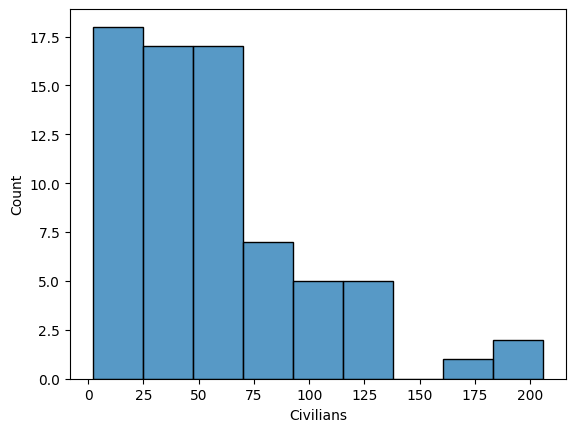

In [80]:
civilian_casualties_hist = sns.histplot(db['Civilians'])


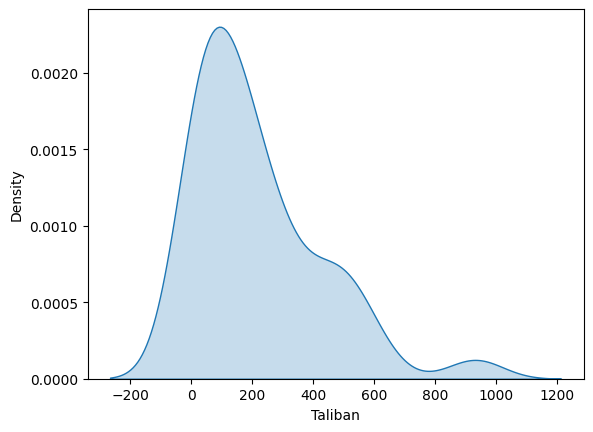

In [81]:
taliban_casualties_kde = sns.kdeplot(db['Taliban'], fill=True)


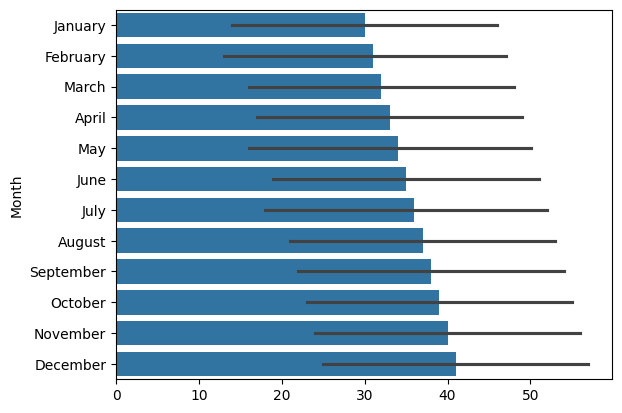

In [82]:
months_bar = sns.barplot(db['Month'])


## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [83]:
for index, row in db.iterrows():
    print(row['Taliban'])

15.0
0.0
19.0
5.0
18.0
163.0
21.0
20.0
33.0
13.0
21.0
15.0
6.0
14.0
38.0
118.0
113.0
143.0
75.0
90.0
89.0
122.0
36.0
48.0
26.0
12.0
36.0
52.0
85.0
295.0
220.0
161.0
945.0
333.0
325.0
216.0
125.0
152.0
76.0
166.0
199.0
564.0
485.0
551.0
917.0
462.0
270.0
172.0
86.0
139.0
90.0
128.0
177.0
306.0
303.0
326.0
142.0
485.0
479.0
223.0
185.0
209.0
202.0
240.0
406.0
526.0
557.0
445.0
614.0
462.0
410.0
287.0


In [87]:
filtered_rows = []
threshold = 500

for index, row in db.iterrows():
    if row['Taliban'] > threshold:
        filtered_rows.append(row)

filtered_db = pd.DataFrame(filtered_rows)

filtered_db

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total casualties
32,2006,September,945.0,172,97.0,19.0,38,1252.0
41,2007,June,564.0,80,98.0,27.0,24,766.0
43,2007,August,551.0,65,89.0,31.0,34,739.0
44,2007,September,917.0,64,144.0,20.0,24,1149.0
65,2009,June,526.0,111,133.0,32.0,38,808.0
66,2009,July,557.0,119,80.0,90.0,76,832.0
68,2009,September,614.0,197,133.0,54.0,70,1014.0


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [91]:
civ_afgf_casualties = ['Civilians','Afghan forces']
#db['date'] = db['Year'].astype(str) + ' ' + db['Month']
included_columns = ['Year','Month','Civilians','Afghan forces']
db_civ_afgf_casualties = db[included_columns]
db_civ_afgf_casualties

,Year,Month,Civilians,Afghan forces
0,2004,January,51,23.0
1,2004,February,7,4.0
2,2004,March,2,0.0
3,2004,April,3,19.0
4,2004,May,29,56.0
...,...,...,...,...
67,2009,August,206,190.0
68,2009,September,197,133.0
69,2009,October,107,86.0
70,2009,November,120,69.0


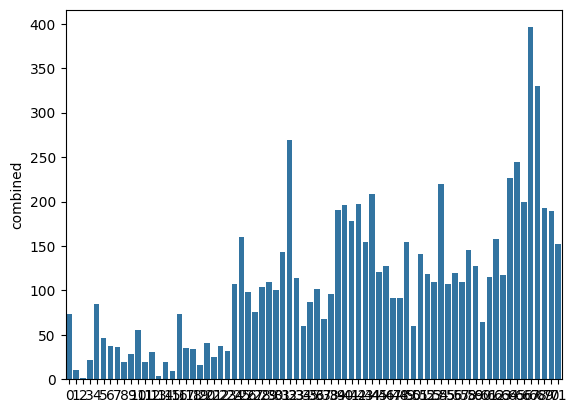

In [98]:
for index, row in db.iterrows():
    db['combined'] = db['Civilians'] + db['Afghan forces']

combined_bar = sns.barplot (db['combined'])
